 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [50]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [51]:
# Reading whale returns
whale_path = ("./Resources/whale_returns.csv")

whale_returns = pd.read_csv(whale_path, index_col ="Date", infer_datetime_format = True, parse_dates  = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [52]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [53]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [54]:
# Reading algorithmic returns
# Reading whale returns
algo_path = Path("./Resources/algo_returns.csv")

algo_returns = pd.read_csv(algo_path, index_col = "Date", infer_datetime_format = True, parse_dates  = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [55]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [56]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [57]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [58]:
# Reading S&P TSX 60 Closing Prices
sp_tsx = Path("./Resources/sp_tsx_history.csv")
sp_tsx_hist_data = pd.read_csv(sp_tsx, index_col = "Date", infer_datetime_format = True, parse_dates  = True)
sp_tsx_hist_data.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [59]:
# Check Data Types
sp_tsx_hist_data.dtypes

Close    object
dtype: object

In [60]:
# Fix Data Types
sp_tsx_hist_data['Close'] = sp_tsx_hist_data['Close'].str.replace("$", "")
sp_tsx_hist_data['Close'] = sp_tsx_hist_data['Close'].str.replace(",", "")
sp_tsx_hist_data['Close'] = sp_tsx_hist_data['Close'].astype("float")
sp_tsx_hist_data.dtypes

C:\Users\Abdul\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [61]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_hist_data.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [62]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)
sp_tsx_returns.isnull().sum()

Close    0
dtype: int64

In [63]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.rename(columns={"Close":"SP_TSX"}, inplace=True)
sp_tsx_returns.head()

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [64]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
total_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis = 'columns', join = 'inner')
total_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

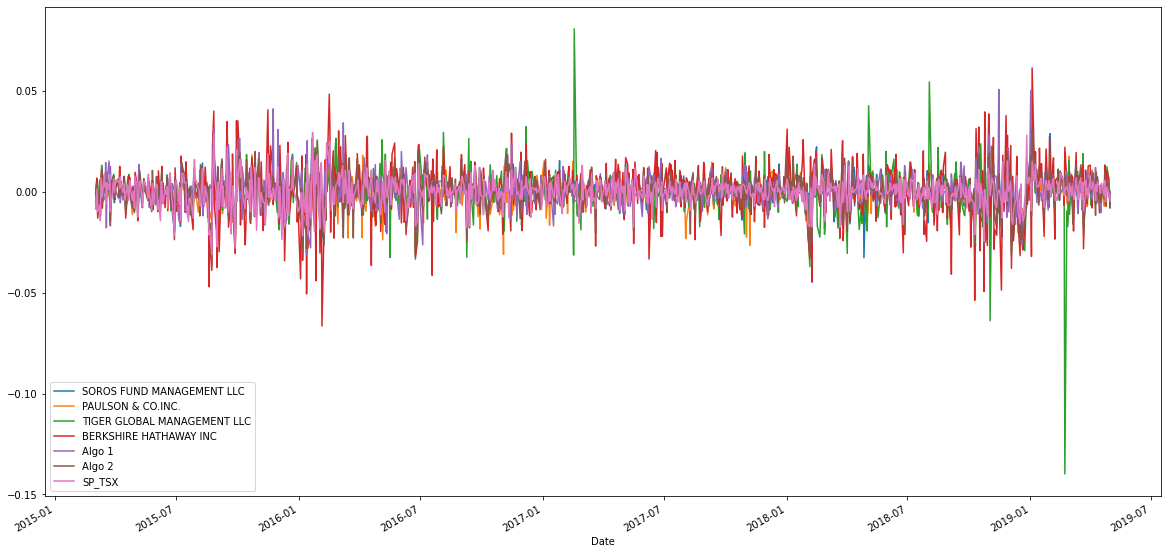

In [65]:
# Plot daily returns of all portfolios
total_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

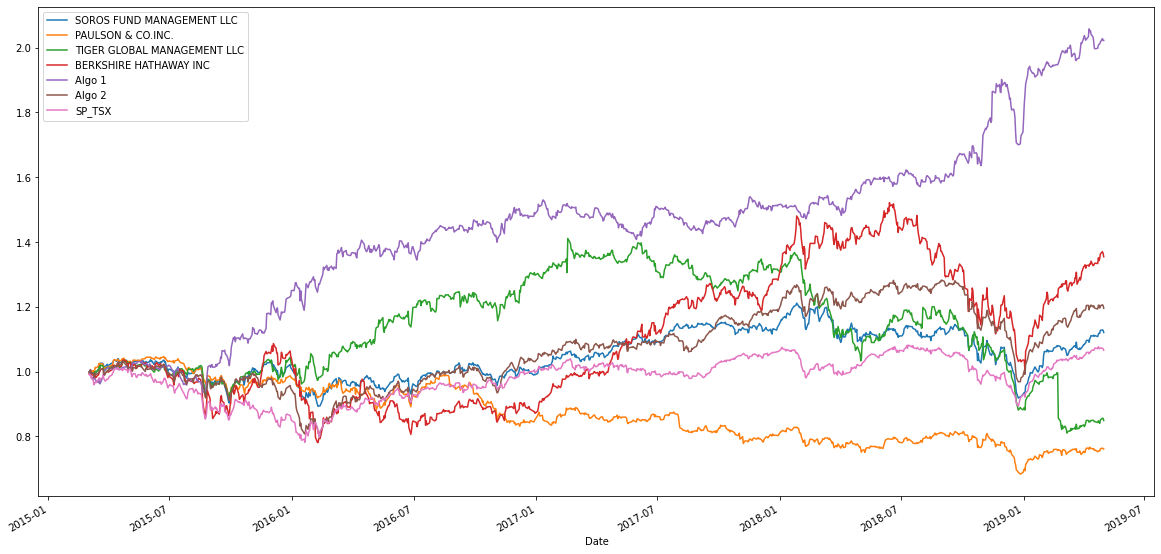

In [66]:
# Calculate cumulative returns of all portfolios
total_returns_cum = (1+ total_returns).cumprod()
# Plot cumulative returns
total_returns_cum.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

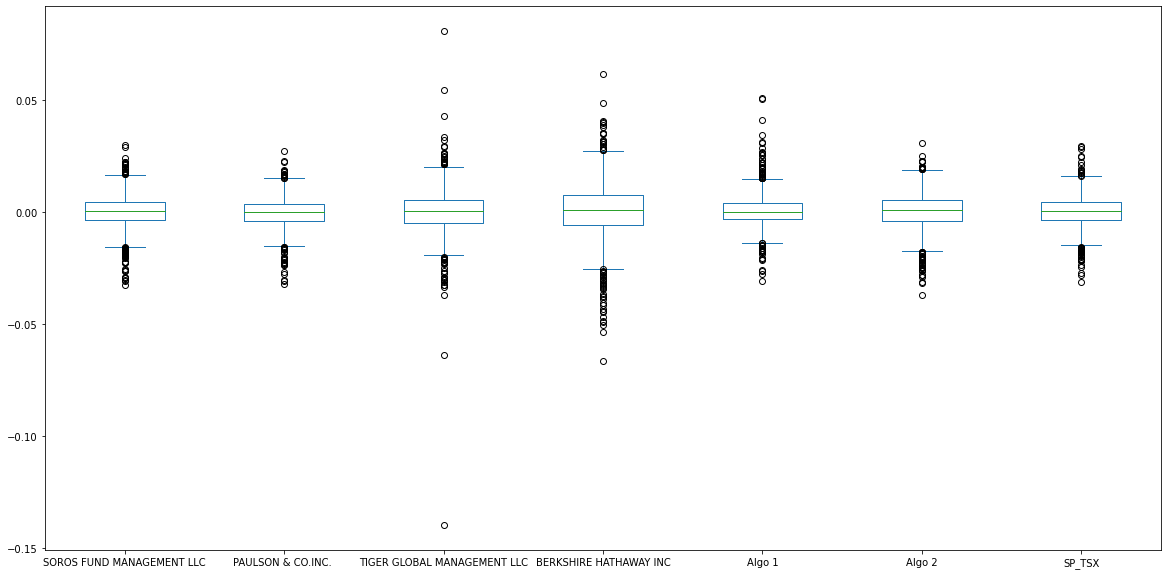

In [67]:
# Box plot to visually show risk
total_returns.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [68]:
# Calculate the daily standard deviations of all portfolios
total_returns_std = pd.DataFrame(total_returns.std()).rename(columns = {0:"std"})
total_returns_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SP_TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [72]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
higher_std = total_returns_std[total_returns_std["std"] > total_returns_std.loc["SP_TSX", "std"]]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized standard deviation (252 trading days)
total_returns_annualized_std = total_returns_std*np.sqrt(252)
total_returns_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
SP_TSX,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

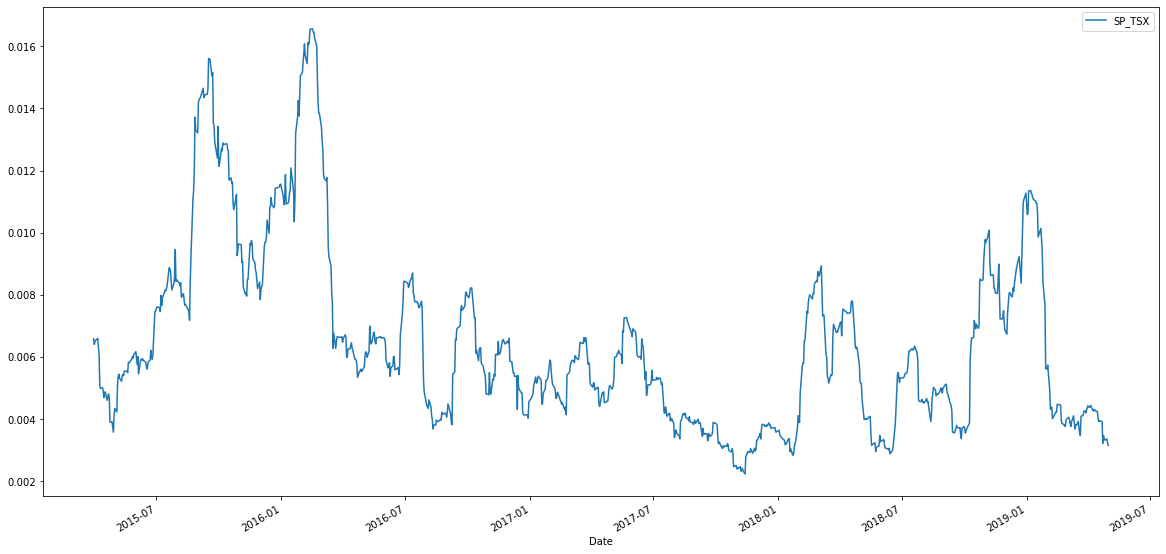

In [74]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
total_returns_rolling_21 = total_returns[["SP_TSX"]].rolling(window = 21).std()

# Plot the rolling standard deviation
total_returns_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [75]:
# Calculate the correlation
correlation_close = pd.DataFrame(total_returns.corr()).loc[:,"SP_TSX"]
correlation_close[correlation_close==correlation_close[correlation_close<1].max()]
# Display de correlation matrix


Algo 2    0.73737
Name: SP_TSX, dtype: float64

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [77]:
# Calculate covariance of a single portfolio 
cov_whale_returns = print(whale_returns.cov(10,20))
# Calculate variance of S&P TSX
sp_tsx_returns_var = sp_tsx_returns["SP_TSX"].var()
# Computing beta
sp_tsx_returns_beta = close_covariance / variance
# Plot beta trend
sp_tsx_returns.plot(figsize = (20,10))

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     0.000063            0.000039   
PAULSON & CO.INC.                             0.000039            0.000050   
TIGER GLOBAL MANAGEMENT LLC                   0.000049            0.000033   
BERKSHIRE HATHAWAY INC                        0.000077            0.000050   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.000049   
PAULSON & CO.INC.                               0.000033   
TIGER GLOBAL MANAGEMENT LLC                     0.000119   
BERKSHIRE HATHAWAY INC                          0.000060   

                             BERKSHIRE HATHAWAY INC  
SOROS FUND MANAGEMENT LLC                  0.000077  
PAULSON & CO.INC.                          0.000050  
TIGER GLOBAL MANAGEMENT LLC                0.000060  
BERKSHIRE HATHAWAY INC                     0.000168  


NameError: name 'close_covariance' is not defined

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

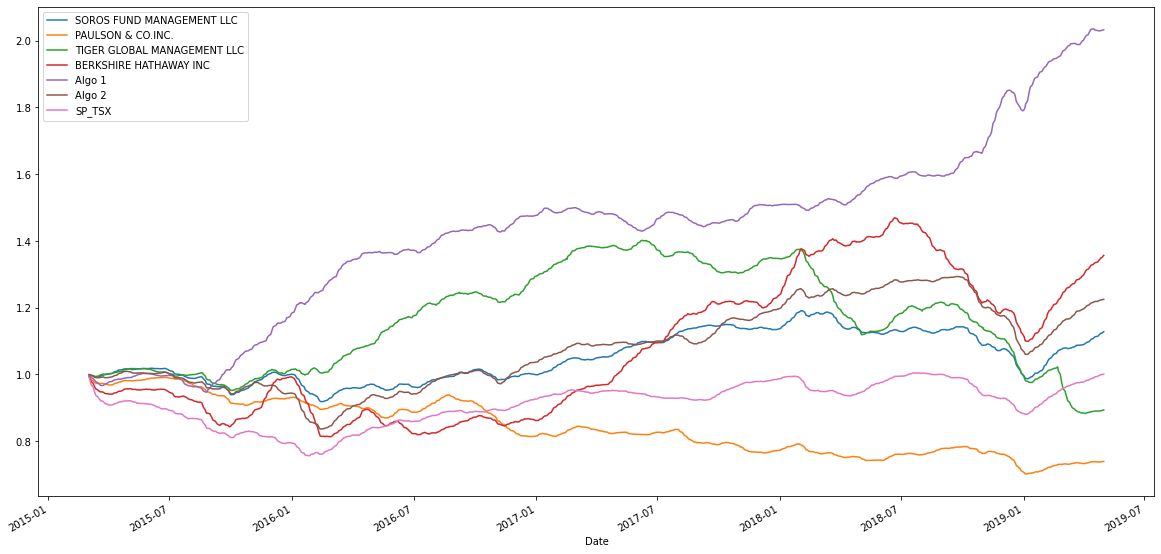

In [78]:
# Use `ewm` to calculate the rolling window
total_returns_ewm = total_returns.ewm(span = 21,adjust = False).mean()
(1+total_returns_ewm).cumprod().plot(figsize = (20,10))

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Annualized Sharpe Ratios
sharpe_ratios = total_returns.mean()*252/(total_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_TSX                         0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

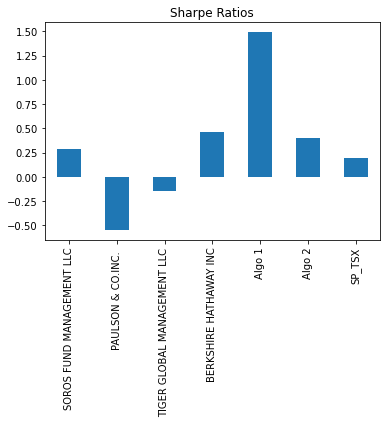

In [80]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [81]:
# Reading data from 1st stock
# Read the first stock

tesla_path = "C:/Users/Abdul/OneDrive/Desktop/Copy of GoogleFinance - Historical Market Dataer.csv"
tesla_stock = pd.read_csv(tesla_path)
tesla_stock = pd.read_csv(tesla_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
tesla_stock.head()

,Price/Tesla
Date,
2019-02-15 16:00:00,63.72
2019-02-22 16:00:00,62.31
2019-03-01 16:00:00,64.00
2019-03-08 16:00:00,59.80
2019-03-15 16:00:00,59.08


###### Reading data from 2nd stock


In [82]:
# Reading data from 2nd stock
pepsi_path = "C:/Users/Abdul/OneDrive/Desktop/Copy of GoogleFinance - Historical Market Dataer3.csv"
pepsi_stock = pd.read_csv(pepsi_path)
pepsi_stock = pd.read_csv(pepsi_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
pepsi_stock.head()

,Price/Costco
Date,
2019-02-15 16:00:00,116.28
2019-02-22 16:00:00,116.97
2019-03-01 16:00:00,117.30
2019-03-08 16:00:00,117.33
2019-03-15 16:00:00,117.56


In [83]:
# Reading data from 3rd stock
costco_path = "C:/Users/Abdul/OneDrive/Desktop/Copy of GoogleFinance - Historical Market Dataer2.csv"
costco_stock = pd.read_csv(costco_path)
costco_stock = pd.read_csv(costco_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
costco_stock.head()

,Price/Pepsi
Date,
2019-02-15 16:00:00,217.25
2019-02-22 16:00:00,219.60
2019-03-01 16:00:00,220.57
2019-03-08 16:00:00,228.70
2019-03-15 16:00:00,237.45


In [86]:
# Combine all stocks in a single DataFrame

# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat((costco_stock, pepsi_stock, tesla_stock), axis = 1, join= "inner")
my_portfolio.sort_index(ascending = True, inplace = True)
my_portfolio.head()

,Price/Pepsi,Price/Costco,Price/Tesla
Date,,,
2019-02-15 16:00:00,217.25,116.28,63.72
2019-02-22 16:00:00,219.60,116.97,62.31
2019-03-01 16:00:00,220.57,117.30,64.00
2019-03-08 16:00:00,228.70,117.33,59.80
2019-03-15 16:00:00,237.45,117.56,59.08


In [87]:
# Reset Date index
my_portfolio.index = my_portfolio.index.normalize()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
# Set weights
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_total_portfolio = my_portfolio.dot(weights)
my_total_portfolio_returns = my_total_portfolio.pct_change()
my_total_portfolio_returns.dropna(inplace = True)
my_total_portfolio_returns.head()


Date
2019-02-22    0.004103
2019-03-01    0.007496
2019-03-08    0.009854
2019-03-15    0.020353
2019-03-22    0.007607
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [100]:
# Join your returns DataFrame to the original returns DataFrame
my_final_portfolio_returns = pd.concat((my_total_portfolio_returns,total_returns), axis = 1, join = "inner")
my_final_portfolio_returns.rename(columns = {0:"my_final_portfolio_returns"}, inplace = True)
my_final_portfolio_returns

,my_final_portfolio_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2019-02-22,0.004103,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,0.000759
2019-03-01,0.007496,0.005292,0.006227,-0.011270,0.006593,-0.000713,0.010077,0.004328
2019-03-08,0.009854,0.000350,0.003437,0.004437,-0.005996,0.007106,-0.002993,-0.003755
2019-03-15,0.020353,0.003264,0.003948,0.005449,0.005083,0.001960,0.003873,0.003282
2019-03-22,0.007607,-0.017664,-0.013698,-0.016745,-0.028230,0.002514,-0.020949,-0.009558
2019-03-29,0.010689,0.001392,0.003030,-0.001277,0.012783,-0.000868,0.004576,-0.003305
2019-04-05,0.017809,0.006880,0.006484,0.009357,0.006128,0.001519,0.009306,0.005183
2019-04-12,-0.007922,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.004943
2019-04-18,0.011038,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.004145


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
my_final_portfolio_returns.dropna(inplace=True)
my_final_portfolio_returns

,my_final_portfolio_returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2019-02-22,0.004103,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,0.000759
2019-03-01,0.007496,0.005292,0.006227,-0.011270,0.006593,-0.000713,0.010077,0.004328
2019-03-08,0.009854,0.000350,0.003437,0.004437,-0.005996,0.007106,-0.002993,-0.003755
2019-03-15,0.020353,0.003264,0.003948,0.005449,0.005083,0.001960,0.003873,0.003282
2019-03-22,0.007607,-0.017664,-0.013698,-0.016745,-0.028230,0.002514,-0.020949,-0.009558
2019-03-29,0.010689,0.001392,0.003030,-0.001277,0.012783,-0.000868,0.004576,-0.003305
2019-04-05,0.017809,0.006880,0.006484,0.009357,0.006128,0.001519,0.009306,0.005183
2019-04-12,-0.007922,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.004943
2019-04-18,0.011038,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.004145


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [107]:
# Calculate the annualized `std`
my_final_portfolio_returns_std = pd.DataFrame(my_final_portfolio_returns.std()).rename(columns = {0:"std"})
my_final_portfolio_returns_std

my_final_portfolio_returns_std = my_final_portfolio_returns_std*np.sqrt(252)
my_final_portfolio_returns_std

,std
my_final_portfolio_returns,0.129357
SOROS FUND MANAGEMENT LLC,0.115538
PAULSON & CO.INC.,0.100156
TIGER GLOBAL MANAGEMENT LLC,0.719819
BERKSHIRE HATHAWAY INC,0.212297
Algo 1,0.052324
Algo 2,0.145271
SP_TSX,0.077256


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

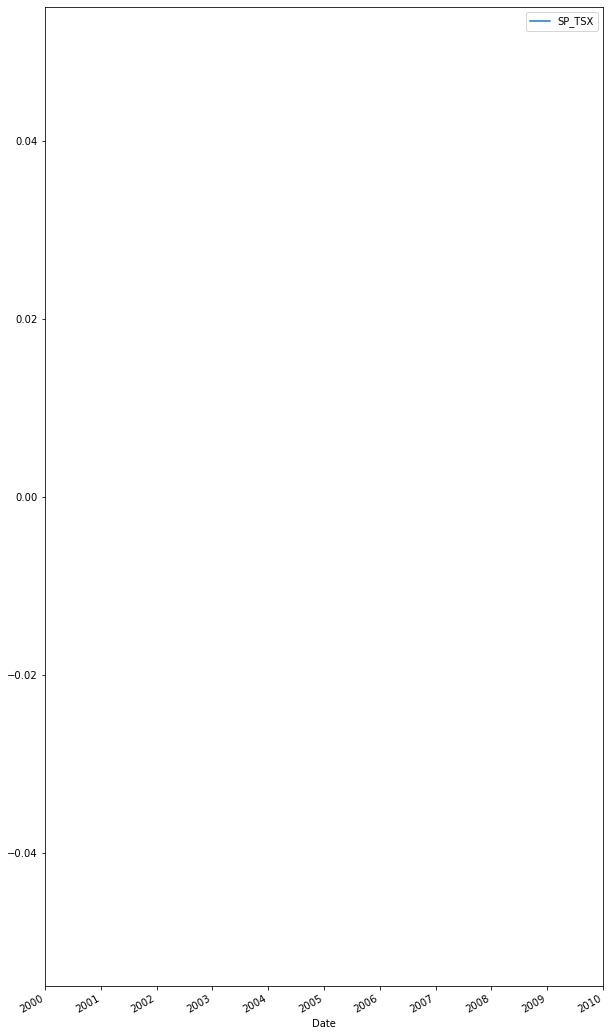

In [119]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
my_final_portfolio_returns_rolling_21 = my_final_portfolio_returns[["SP_TSX"]].rolling(window = 21).std()

# Plot the rolling standard deviation
my_final_portfolio_returns_rolling_21.plot(figsize = (10,20))

### Calculate and plot the correlation

In [123]:
# Calculate and plot the correlation
correlation_my_final_portfolio_returns = my_final_portfolio_returns.corr().loc[:,"my_final_portfolio_returns"]
correlation_my_final_portfolio_returns[correlation_my_final_portfolio_returns==correlation_my_final_portfolio_returns[correlation_my_final_portfolio_returns<1].max()]
correlation_my_final_portfolio_returns.plot

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of my_final_portfolio_returns'}, xlabel='Date'>

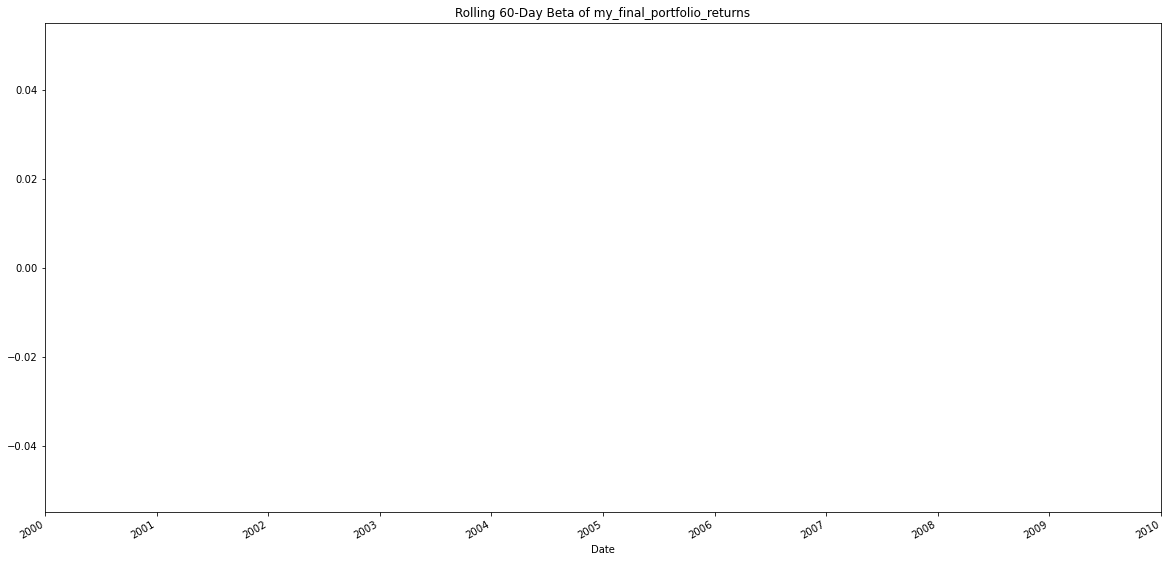

In [126]:
# Calculate and plot Beta
# Beta
rolling_covariance = my_final_portfolio_returns['my_final_portfolio_returns'].rolling(window=60).cov(my_final_portfolio_returns['SP_TSX'])
rolling_variance = my_final_portfolio_returns['SP_TSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my_final_portfolio_returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [128]:
# Calculate Annualized Sharpe Ratios
# Annualzied Sharpe Ratios
trading_days = my_final_portfolio_returns.count()
sharpe_ratios = my_final_portfolio_returns.mean()*trading_days/(my_final_portfolio_returns.std()*np.sqrt(trading_days))

In [129]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

IndentationError: unexpected indent (Temp/ipykernel_1948/254580145.py, line 2)

### How does your portfolio do?

Write your answer here!

In [ ]:
Couldn't visualise my data :(